In [1]:
import pandas as pd

In [15]:
import sqlite3
connTeams = sqlite3.connect("Data/teams.sqlite")
connOdds = sqlite3.connect("Data/odds.sqlite")
connData = sqlite3.connect("Data/dataset.sqlite")

sqlSelectTables = "SELECT name FROM sqlite_master WHERE type='table';"

tables_teams = pd.read_sql(sqlSelectTables, connTeams)
tables_odds = pd.read_sql(sqlSelectTables, connOdds)
tables_data = pd.read_sql(sqlSelectTables, connData)

print(tables_teams)
print(tables_odds)
print(tables_data)

                     name
0       teams_2021-22-2-5
1     teams_2021-22-12-31
2      teams_2021-22-12-9
3      teams_2021-22-1-17
4     teams_2021-22-11-22
...                   ...
4228   teams_2023-24-4-10
4229   teams_2023-24-4-11
4230   teams_2023-24-4-12
4231   teams_2023-24-4-13
4232          peopleybits

[4233 rows x 1 columns]
            name
0   odds_2021-22
1   odds_2020-21
2   odds_2019-20
3   odds_2018-19
4   odds_2017-18
5   odds_2016-17
6   odds_2015-16
7   odds_2014-15
8   odds_2013-14
9   odds_2012-13
10  odds_2011-12
11  odds_2010-11
12  odds_2009-10
13  odds_2008-09
14  odds_2007-08
15  odds_2022-23
16  odds_2023-24
              name
0  dataset_2012-23
1  dataset_2012-24


In [18]:
# Read the table into a pandas DataFrame
table_name = "teams_2023-24-4-13"
escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
df_teams = pd.read_sql("SELECT * FROM " + escaped_table_name, connTeams)

table_name = "odds_2023-24"
escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
df_odds = pd.read_sql("SELECT * FROM " + escaped_table_name, connOdds)

table_name = "dataset_2012-24"
escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
df_data = pd.read_sql("SELECT * FROM " + escaped_table_name, connData)


# Display the DataFrame
print(df_teams.head())
print(df_odds.head())
print(df_data.head())


   index     TEAM_ID          TEAM_NAME  GP   W   L  W_PCT   MIN   FGM   FGA  \
0      0  1610612737      Atlanta Hawks  80  36  44  0.450  48.4  43.1  92.6   
1      1  1610612738     Boston Celtics  80  62  18  0.775  48.4  43.7  90.0   
2      2  1610612751      Brooklyn Nets  80  32  48  0.400  48.3  40.8  89.3   
3      3  1610612766  Charlotte Hornets  80  20  60  0.250  48.1  40.0  87.1   
4      4  1610612741      Chicago Bulls  80  38  42  0.475  48.7  41.9  89.3   

   ...  AST_RANK  TOV_RANK  STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  \
0  ...        17        16        14        24         22       14         7   
1  ...        14         1        28         2          1        2        30   
2  ...        19        12        26        12         17       13        21   
3  ...        27        18        25        26         14        8        29   
4  ...        23         3        10        18         13       17        16   

   PTS_RANK  PLUS_MINUS_RANK        Da

In [4]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,teams_2021-22-2-5
1,teams_2021-22-12-31
2,teams_2021-22-12-9
3,teams_2021-22-1-17
4,teams_2021-22-11-22
...,...
4228,teams_2023-24-4-10
4229,teams_2023-24-4-11
4230,teams_2023-24-4-12
4231,teams_2023-24-4-13


In [5]:
season_2021_22 = tables[tables['name'].str.contains('teams_2021-22')]
season_2021_22

# Check the schema for teams_2021-22-2-5
# columns_2021_22_2_5 = pd.read_sql("PRAGMA table_info(teams_2021-22-2-5);", conn)
# columns_2021_22_2_5

# # Preview the first 5 rows from teams_2021-22-2-5
# preview_2021_22_2_5 = pd.read_sql('SELECT * FROM teams_2021-22-2-5 LIMIT 5;', conn)
# preview_2021_22_2_5



,name
0,teams_2021-22-2-5
1,teams_2021-22-12-31
2,teams_2021-22-12-9
3,teams_2021-22-1-17
4,teams_2021-22-11-22
...,...
251,teams_2021-22-5-18
252,teams_2021-22-5-21
253,teams_2021-22-6-11
254,teams_2021-22-4-12


In [6]:
# Loop through a selection of tables and show their preview with escaped table names
for table_name in season_2021_22['name']:
    print(f"Preview of table: {table_name}")
    escaped_table_name = f'"{table_name}"'  # Escape table name with double quotes
    preview = pd.read_sql(f'SELECT * FROM {escaped_table_name} LIMIT 5;', conn)
    print(preview)
    print("\n")

Preview of table: teams_2021-22-2-5
   index  Unnamed: 0     TEAM_ID          TEAM_NAME  GP   W   L  W_PCT   MIN  \
0      0           0  1610612737      Atlanta Hawks  52  25  27  0.481  48.0   
1      1           1  1610612738     Boston Celtics  54  29  25  0.537  48.7   
2      2           2  1610612751      Brooklyn Nets  52  29  23  0.558  48.2   
3      3           3  1610612766  Charlotte Hornets  53  28  25  0.528  48.4   
4      4           4  1610612741      Chicago Bulls  52  33  19  0.635  48.1   

    FGM  ...  STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
0  40.8  ...        28        23         11        5         7         6   
1  39.3  ...        20         2         16        9        17        19   
2  41.6  ...        25         7         24       20        16        10   
3  42.3  ...         5        12         15       17        12         1   
4  41.7  ...        17        20         22        8        28         8   

   PLUS_MINUS_RANK  CFID  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load data from a specific table into a DataFrame (e.g., teams_2021-22-2-5)
escaped_table_name = '"teams_2021-22-2-5"'
df = pd.read_sql(f'SELECT * FROM {escaped_table_name};', conn)

# Preview the data
df.head()


,index,Unnamed: 0,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS,Date
0,0,0,1610612737,Atlanta Hawks,52,25,27,0.481,48.0,40.8,...,28,23,11,5,7,6,16,10,Atlanta Hawks,2022-02-05
1,1,1,1610612738,Boston Celtics,54,29,25,0.537,48.7,39.3,...,20,2,16,9,17,19,7,10,Boston Celtics,2022-02-05
2,2,2,1610612751,Brooklyn Nets,52,29,23,0.558,48.2,41.6,...,25,7,24,20,16,10,15,10,Brooklyn Nets,2022-02-05
3,3,3,1610612766,Charlotte Hornets,53,28,25,0.528,48.4,42.3,...,5,12,15,17,12,1,18,10,Charlotte Hornets,2022-02-05
4,4,4,1610612741,Chicago Bulls,52,33,19,0.635,48.1,41.7,...,17,20,22,8,28,8,11,10,Chicago Bulls,2022-02-05


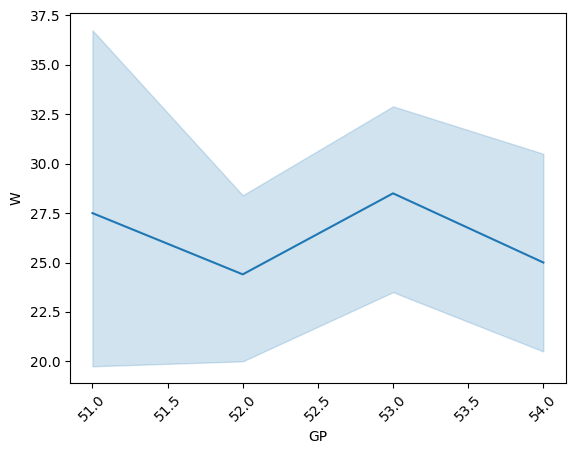

In [8]:
# Example line plot: Assuming you have "date" and "score" columns
sns.lineplot(data=df, x='GP', y='W')  # Replace 'date' and 'score' with actual columns
plt.xticks(rotation=45)
plt.show()


In [21]:
# Find columns shared across all tables in the 2021-22 season
shared_columns = None
for table_name in season_2021_22['name']:
    escaped_table_name = '"' + table_name + '"'
    # print(escaped_table_name)
    columns = pd.read_sql(f"PRAGMA table_info({escaped_table_name});", conn)['name']
    if shared_columns is None:
        shared_columns = set(columns)
        # shared_columns
    else:
        shared_columns.intersection_update(columns)
        
shared_columns


{'AST',
 'AST_RANK',
 'BLK',
 'BLKA',
 'BLKA_RANK',
 'BLK_RANK',
 'CFID',
 'CFPARAMS',
 'DREB',
 'DREB_RANK',
 'Date',
 'FG3A',
 'FG3A_RANK',
 'FG3M',
 'FG3M_RANK',
 'FG3_PCT',
 'FG3_PCT_RANK',
 'FGA',
 'FGA_RANK',
 'FGM',
 'FGM_RANK',
 'FG_PCT',
 'FG_PCT_RANK',
 'FTA',
 'FTA_RANK',
 'FTM',
 'FTM_RANK',
 'FT_PCT',
 'FT_PCT_RANK',
 'GP',
 'GP_RANK',
 'L',
 'L_RANK',
 'MIN',
 'MIN_RANK',
 'OREB',
 'OREB_RANK',
 'PF',
 'PFD',
 'PFD_RANK',
 'PF_RANK',
 'PLUS_MINUS',
 'PLUS_MINUS_RANK',
 'PTS',
 'PTS_RANK',
 'REB',
 'REB_RANK',
 'STL',
 'STL_RANK',
 'TEAM_ID',
 'TEAM_NAME',
 'TOV',
 'TOV_RANK',
 'Unnamed: 0',
 'W',
 'W_PCT',
 'W_PCT_RANK',
 'W_RANK',
 'index'}